# Unicorn Companies Analysis

Hello, my name is Widya and this is analysis of Unicorn Companies dataset that i got from Maven Analytics.

This dataset contains data of private companies with a valuation over $1 billion as of March 2022, including each company's current valuation, funding, country of origin, industry, select investors, and the years they were founded and became unicorns.

The main goal of this analysis is to answer these questions:
1. Which unicorn companies have had the biggest return on investment?
2. How long does it usually take for a company to become a unicorn? Has it always been this way?
3. Which countries have the most unicorns? Are there any cities that appear to be industry hubs?
4. Which investors have funded the most unicorns?

In [46]:
# Importing python libraries that will be needed to perform the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load the dataset
data = pd.read_csv('Unicorn_Companies.csv')

In [48]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180000000000,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,8000000000,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100000000000,12/1/2012,Other,Hawthorne,United States,North America,2002,7000000000,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100000000000,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2000000000,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95000000000,1/23/2014,Fintech,San Francisco,United States,North America,2010,2000000000,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46000000000,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,4000000000,"Institutional Venture Partners, Sequoia Capita..."


The dataset contains information on unicorn companies (private companies valued at over 1 billion dollars).
It includes the following fields:
- Company: Name of the company
- Valuation: Company valuation in billions (B) of dollars
- Date Joined: The date the company reached $1 billion valuation
- Industry: Industry of the company
- City: City where the company was founded
- Country: Country where the company was founded
- Continent: Continent where the company was founded
- Year Founded: Year the company was founded
- Funding: Total amount raised across all funding rounds in billions (B) or millions (M) of dollars
- Select Investors: Top 4 investing firms or individual investors

In [49]:
# Displaying the data types and summary statistics
print("Data types and summary statistics:")
print(data.info())
data.describe(include='all')

Data types and summary statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1045 non-null   object
 1   Valuation         1045 non-null   int64 
 2   Date Joined       1045 non-null   object
 3   Industry          1045 non-null   object
 4   City              1045 non-null   object
 5   Country           1045 non-null   object
 6   Continent         1045 non-null   object
 7   Year Founded      1045 non-null   int64 
 8   Funding           1045 non-null   int64 
 9   Select Investors  1044 non-null   object
dtypes: int64(3), object(7)
memory usage: 81.8+ KB
None


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
count,1045,1.045000e+03,1045,1045,1045,1045,1045,1045.000000,1.045000e+03,1044
unique,1044,NaN,633,16,252,44,6,NaN,NaN,1030
top,Bolt,NaN,7/13/2021,Fintech,San Francisco,United States,North America,NaN,NaN,"Global Founders Capital, Shea Ventures, Greycroft"
freq,2,NaN,8,216,152,555,580,NaN,NaN,2
mean,NaN,3.475598e+09,NaN,NaN,NaN,NaN,NaN,2012.982775,5.577904e+08,NaN
std,NaN,8.613154e+09,NaN,NaN,NaN,NaN,NaN,4.907935,8.145278e+08,NaN
min,NaN,1.000000e+09,NaN,NaN,NaN,NaN,NaN,1979.000000,1.000000e+06,NaN
25%,NaN,1.000000e+09,NaN,NaN,NaN,NaN,NaN,2011.000000,2.230000e+08,NaN
50%,NaN,2.000000e+09,NaN,NaN,NaN,NaN,NaN,2014.000000,3.700000e+08,NaN
75%,NaN,3.000000e+09,NaN,NaN,NaN,NaN,NaN,2016.000000,6.100000e+08,NaN


In [50]:
# Convert 'Date Joined' to datetime format
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

# Convert 'Year Founded' to datetime format (setting day and month to 01 for consistency)
data['Year Founded'] = pd.to_datetime(data['Year Founded'], format='%Y')

In [52]:
# Display cleaned data
print("Cleaned data:")
data.head()

Cleaned data:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Time to Unicorn
0,Bytedance,180000000000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8000000000,"Sequoia Capital China, SIG Asia Investments, S...",5.268493
1,SpaceX,100000000000,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7000000000,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.923288
2,SHEIN,100000000000,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2000000000,"Tiger Global Management, Sequoia Capital China...",10.509589
3,Stripe,95000000000,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2000000000,"Khosla Ventures, LowercaseCapital, capitalG",4.063014
4,Klarna,46000000000,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4000000000,"Institutional Venture Partners, Sequoia Capita...",6.947945


From the code above, almost all columns have appropriate data types except for date joined and year founded.

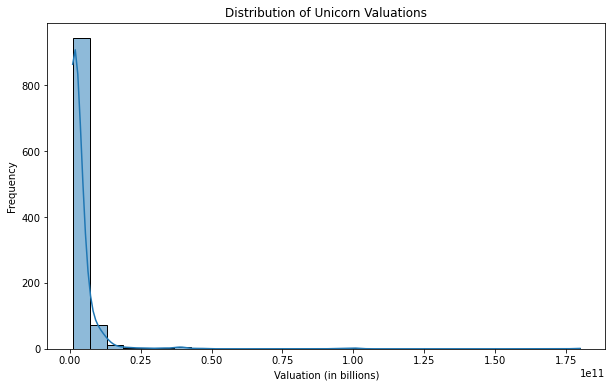

In [53]:
# Distribution of valuations
plt.figure(figsize=(10, 6))
sns.histplot(data['Valuation'], bins=30, kde=True)
plt.title('Distribution of Unicorn Valuations')
plt.xlabel('Valuation (in billions)')
plt.ylabel('Frequency')
plt.show()

This way it is hard for us to interpret the visualization so i will apply log tranformation for a better visualization.

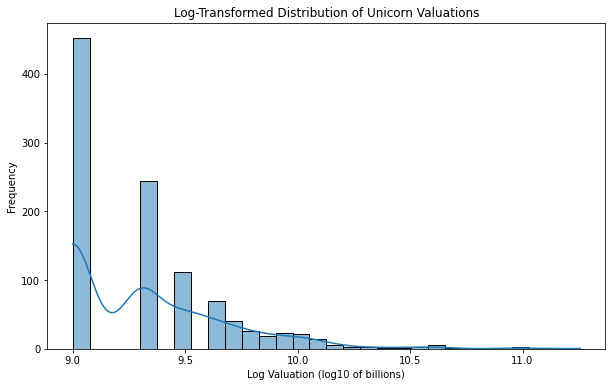

In [54]:
# Apply log transformation to the Valuation column
data['Log Valuation'] = np.log10(data['Valuation'])

# Plot the distribution of log-transformed valuations
plt.figure(figsize=(10, 6))
sns.histplot(data['Log Valuation'], bins=30, kde=True)
plt.title('Log-Transformed Distribution of Unicorn Valuations')
plt.xlabel('Log Valuation (log10 of billions)')
plt.ylabel('Frequency')
plt.show()

From the histogram we can see that unicorn companies are valued between 1 to 10 billion.
There are less companies with higher valuations than those with lower valuations, and this reflected in a right-skewed distributions.

Return on investment (ROI) is a performance measure used to evaluate the efficiency or profitability of an investment or compare the efficiency of a number of different investments. ROI tries to directly measure the amount of return on a particular investment, relative to the investment’s cost.

To calculate ROI, the benefit (or return) of an investment is divided by the cost of the investment. The result is expressed as a percentage or a ratio.

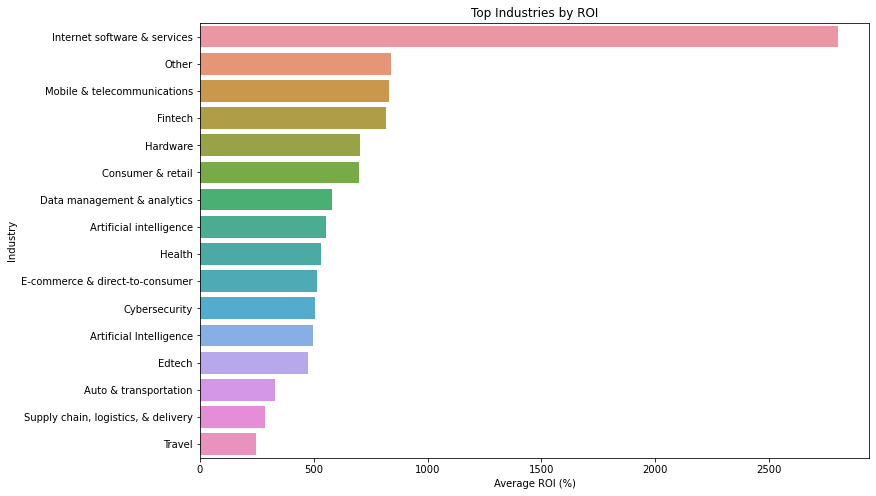

In [70]:
# Calculating ROI
data['ROI'] = ((data['Valuation'] - data['Funding']) / data['Funding']) * 100

# Visualizing top industries by ROI
plt.figure(figsize=(12, 8))
sns.barplot(y=top_industries_by_roi.index, x=top_industries_by_roi.values)
plt.title('Top Industries by ROI')
plt.xlabel('Average ROI (%)')
plt.ylabel('Industry')
plt.show()

In [71]:
# Displaying top industries by ROI
top_industries_by_roi = data.groupby('Industry')['ROI'].mean().sort_values(ascending=False)
print("Top Industries by ROI:")
print(top_industries_by_roi)

Top Industries by ROI:
Industry
Internet software & services           2800.390592
Other                                   840.785540
Mobile & telecommunications             830.202215
Fintech                                 819.739453
Hardware                                702.556703
Consumer & retail                       700.409123
Data management & analytics             580.726529
Artificial intelligence                 556.096198
Health                                  530.024617
E-commerce & direct-to-consumer         514.440315
Cybersecurity                           504.434051
Artificial Intelligence                 498.532209
Edtech                                  474.798590
Auto & transportation                   329.215621
Supply chain, logistics, & delivery     286.079262
Travel                                  246.144451
Name: ROI, dtype: float64


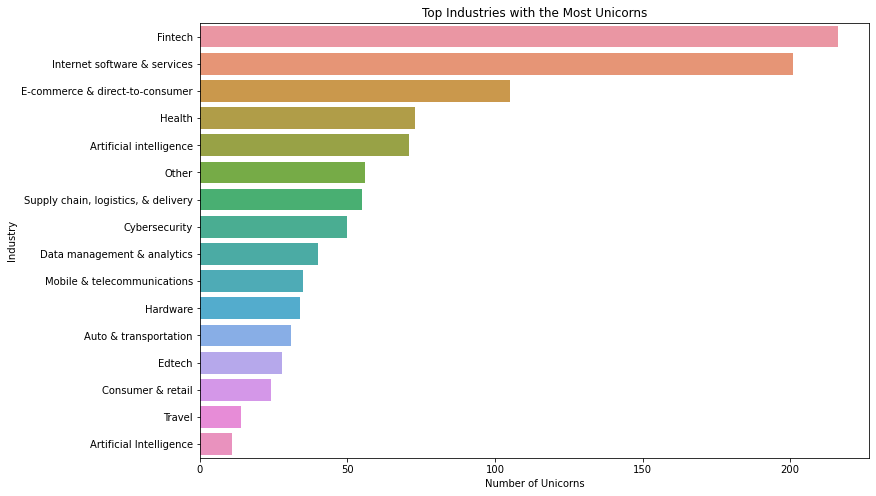

In [56]:
# Industry analysis
industry_counts = data['Industry'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=industry_counts.index, x=industry_counts.values)
plt.title('Top Industries with the Most Unicorns')
plt.xlabel('Number of Unicorns')
plt.ylabel('Industry')
plt.show()

Fintech as the lead industry with most unicorns and internet software & services come close in the second.

In [51]:
# Calculate 'Time to Unicorn'
data['Time to Unicorn'] = (data['Date Joined'] - data['Year Founded']).dt.days / 365

# Handle potential errors in 'Time to Unicorn'
data = data[data['Time to Unicorn'] >= 0]

In [59]:
# Display the average time to become a unicorn
average_time_to_unicorn = data['Time to Unicorn'].mean()
average_time_to_unicorn

7.414307458143079

In [60]:
# Display the distribution of time to become a unicorn
data['Time to Unicorn'].describe()

count    1044.000000
mean        7.414307
std         4.516342
min         0.498630
25%         4.462329
50%         6.461644
75%         9.067123
max        37.879452
Name: Time to Unicorn, dtype: float64

From the output above, it shows that the average time period for one company to be a unicorn is approximately 7.41 years with the fastest company being one in 0.49 years and the slowest being 37 years.

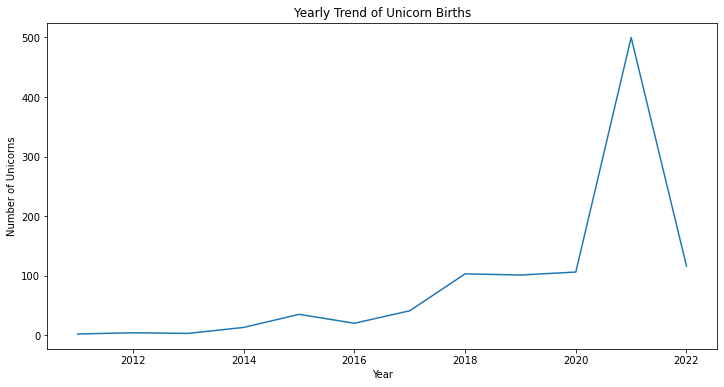

In [55]:
# Yearly trend of unicorn births
data['Year Joined'] = data['Date Joined'].dt.year
unicorns_per_year = data['Year Joined'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=unicorns_per_year.index, y=unicorns_per_year.values)
plt.title('Yearly Trend of Unicorn Births')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.show()

From the line chart we can see that the trend of unicorn birth have increased over the years, and between 2021 and 2022 is the period with the most number of unicorns.

In [67]:
# Count the number of unicorns by country
country_counts = data['Country'].value_counts()

# Display the top countries
top_countries = country_counts.head()
top_countries

United States     555
China             169
India              65
United Kingdom     43
Germany            25
Name: Country, dtype: int64

In [68]:
# Count the number of unicorns by city
city_counts = data['City'].value_counts()

# Display the top cities
top_cities = city_counts.head()
top_cities

San Francisco    152
New York         102
Beijing           61
Shanghai          43
London            34
Name: City, dtype: int64

It shows that United States is the country with most unicorn with San Francisco being the lead city.

In [57]:
# Split the 'Select Investors' column into a list of investors
data['Select Investors'] = data['Select Investors'].str.split(', ')

# Create a flat list of all investors
all_investors = data['Select Investors'].explode()

# Count the number of unicorns each investor has funded
investor_counts = all_investors.value_counts()

# Display the top investors
top_investors = investor_counts.head()
top_investors

Accel                      59
Andreessen Horowitz        52
Tiger Global Management    52
Insight Partners           46
Sequoia Capital            45
Name: Select Investors, dtype: int64

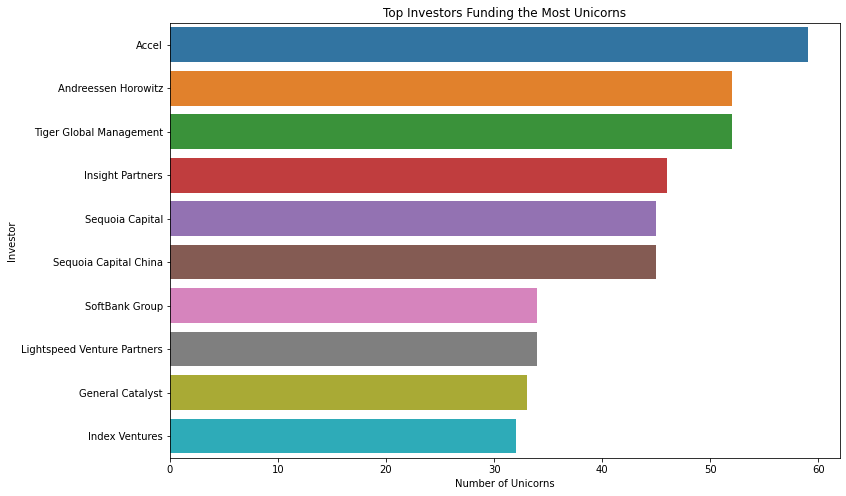

In [58]:
# Count the number of unicorns each investor has funded
investor_counts = all_investors.value_counts()

# Plot the top investors
plt.figure(figsize=(12, 8))
sns.barplot(y=investor_counts.head(10).index, x=investor_counts.head(10).values)
plt.title('Top Investors Funding the Most Unicorns')
plt.xlabel('Number of Unicorns')
plt.ylabel('Investor')
plt.show()

Accel is the top investor that has funded more than 50 unicorns.